In [50]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
np.random.seed(0)

In [51]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [52]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

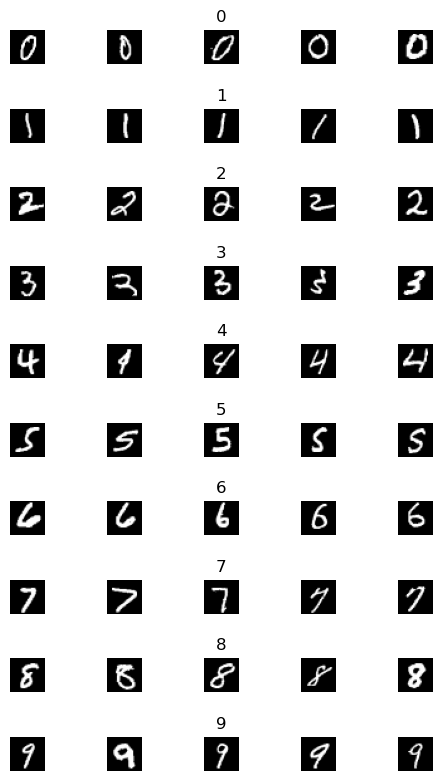

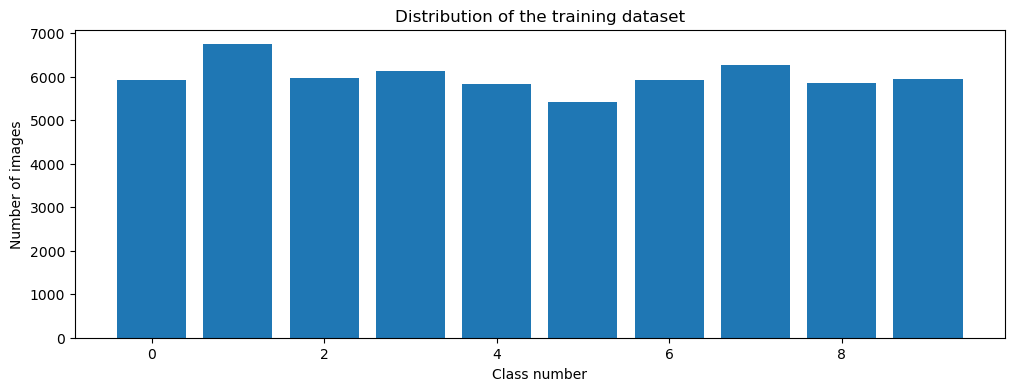

In [53]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [54]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255 
X_test = X_test/255

In [55]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

c:\Users\dknjy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7059 - loss: 0.8745 - val_accuracy: 0.9278 - val_loss: 0.2484
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9165 - loss: 0.2818 - val_accuracy: 0.9383 - val_loss: 0.2013
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9281 - loss: 0.2366 - val_accuracy: 0.9425 - val_loss: 0.1969
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9336 - loss: 0.2172 - val_accuracy: 0.9407 - val_loss: 0.2080
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9372 - loss: 0.2045 - val_accuracy: 0.9462 - val_loss: 0.1847
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9412 - loss: 0.1915 - val_accuracy: 0.9487 - val_loss: 0.1778
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9390 - loss: 0.1960 - val_accuracy: 0.9442 - val_loss: 0.1981
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9440 - loss: 0.1822 - val_accurac

Text(0.5, 0, 'epoch')

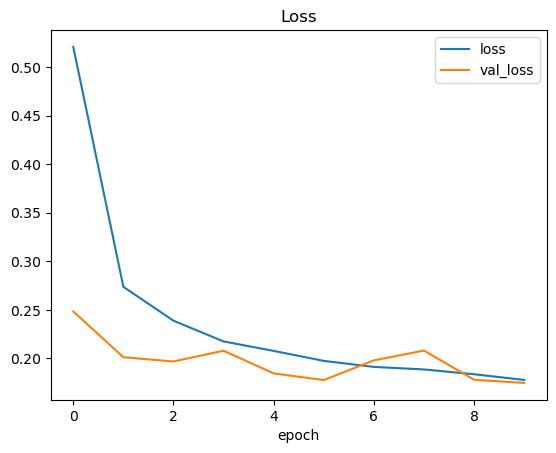

In [56]:
model = create_model()
print(model.summary())
 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

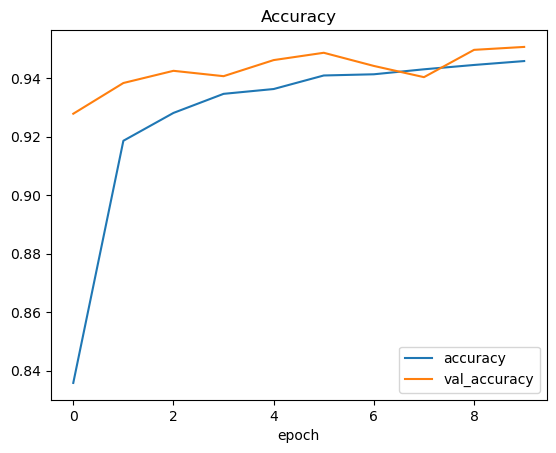

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [58]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.20418833196163177
Test accuracy: 0.9423999786376953


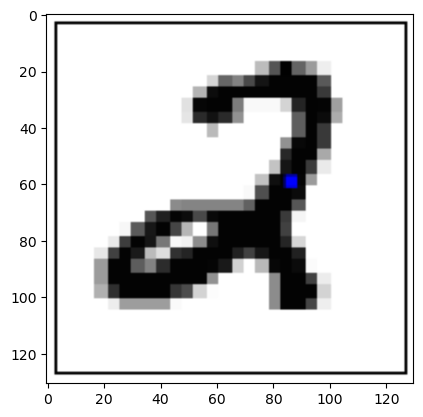

In [68]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
predicted digit: [2]


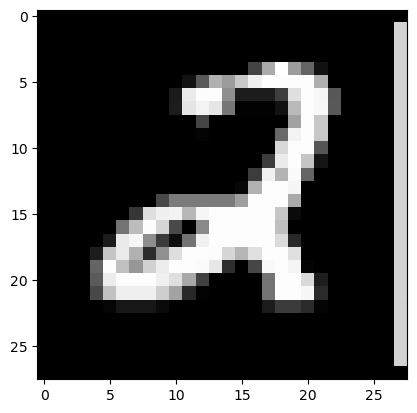

In [69]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)
 
prediction = model.predict(img)
pred_classes = np.argmax(prediction, axis=1)
print("predicted digit:", str(pred_classes))